In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

### Load the Data

In [3]:
from seaborn import load_dataset
iris =  load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### 0 ----> Setosa
### 1 ----> Versicolor
### 2 ----> Virginica

In [7]:
iris['species'] = iris['species'].map({'setosa':0,'versicolor':1,'virginica':2})


In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris['species'].unique()

array([0, 1, 2])

### split data into train and test

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
       iris[['sepal_length','sepal_width','petal_length','petal_width']], iris['species'],random_state=1)

In [11]:
len(X_train)

112

In [12]:
len(X_test)

38

In [15]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5


In [16]:
Y_train.head()

54     1
108    2
112    2
17     0
119    2
Name: species, dtype: int64

In [17]:
model = LogisticRegression()

### train the model

In [18]:
model.fit(X_train,Y_train)

/home/kapil/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### predictions on test_data_set

In [19]:
pred = model.predict(X_test)

In [21]:
pred[:5]

array([0, 1, 1, 0, 2])

In [22]:
Y_test[:5]

14     0
98     1
75     1
16     0
131    2
Name: species, dtype: int64

### Check the accuracy of this model

In [23]:
accuracy_score(Y_test, pred)

0.9736842105263158

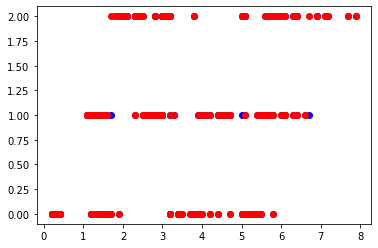

In [27]:
plt.plot(X_test, Y_test, 'bo')
plt.plot(X_test, pred, 'ro')
plt.show()

In [33]:
pred[:5]

array([0, 1, 1, 0, 2])

In [28]:
model.predict_proba(X_test)

array([[9.83571668e-01, 1.64282973e-02, 3.45197560e-08],
       [2.80908231e-01, 7.15889406e-01, 3.20236252e-03],
       [6.57119337e-03, 8.81899925e-01, 1.11528882e-01],
       [9.84473479e-01, 1.55264230e-02, 9.80803816e-08],
       [1.43777054e-06, 2.10911970e-02, 9.78907365e-01],
       [4.69846175e-03, 6.16765896e-01, 3.78535642e-01],
       [1.63993262e-04, 1.35163758e-01, 8.64672249e-01],
       [9.56263436e-01, 4.37347672e-02, 1.79711224e-06],
       [9.68805711e-01, 3.11938247e-02, 4.64314873e-07],
       [1.15208138e-05, 2.96007691e-02, 9.70387710e-01],
       [1.99737370e-02, 8.68337079e-01, 1.11689184e-01],
       [9.64763893e-01, 3.52354474e-02, 6.59578463e-07],
       [5.64729938e-06, 3.37221245e-02, 9.66272228e-01],
       [7.42461726e-03, 7.91493494e-01, 2.01081889e-01],
       [7.29910872e-03, 7.36074858e-01, 2.56626034e-01],
       [9.87668338e-01, 1.23315578e-02, 1.04109606e-07],
       [2.37129514e-02, 9.30662303e-01, 4.56247460e-02],
       [1.13791867e-02, 6.64716

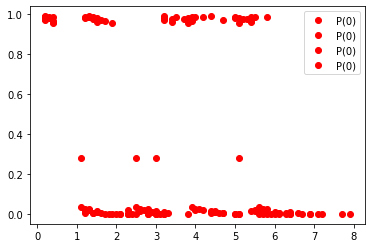

In [30]:
proba = model.predict_proba(X_test)
plt.plot(X_test, proba[:, 0], 'ro', label="P(0)")
plt.legend()

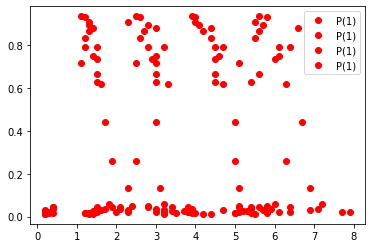

In [31]:
proba = model.predict_proba(X_test)
plt.plot(X_test, proba[:, 1], 'ro', label="P(1)")
plt.legend()

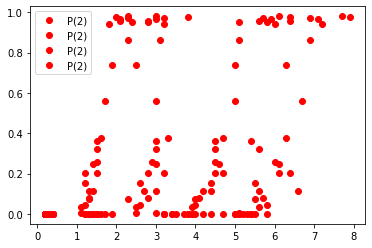

In [32]:
proba = model.predict_proba(X_test)
plt.plot(X_test, proba[:, 2], 'ro', label="P(2)")
plt.legend()